In [124]:
import re

import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('../datasets/Student Feedback Surveys-Superview.csv')

In [125]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


In [126]:
def get_nps(rating):
    if rating != '#ERROR!':
        rating = int(rating)
        if rating > 8:
            return 'Promoter'
        elif rating > 6:
            return 'Passive'
        else:
            return 'Detractor'
    else:
        return np.nan

In [127]:
def clean_track(track):
    if track == 'Apps, Explorer':
        return 'Apps'
    elif track == 'Games, Explorer':
        return 'Games'
    else:
        return track

In [128]:
def clean_week(week):
    week_num = week.replace('Week', '')
    return int(week_num)

In [129]:
df['NPS'] = df['Rating (Num)'].dropna().apply(get_nps).astype(str)

In [130]:
df['Track_Orig'] = df['Track']
df['Track'] = df['Track_Orig'].dropna().apply(clean_track)

In [131]:
df['Week_Orig'] = df['Week']
df['Week'] = df['Week_Orig'].dropna().apply(clean_week)

In [132]:
# 1) There are 639 more promoters than detractors
df['NPS'].value_counts()

Promoter     760
Passive      569
Detractor    121
nan            3
Name: NPS, dtype: int64

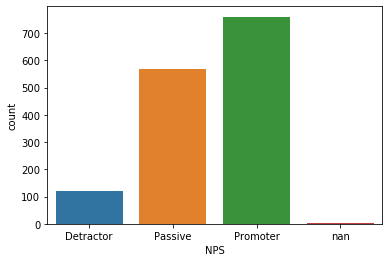

In [133]:
sns.countplot(x='NPS', data=df)

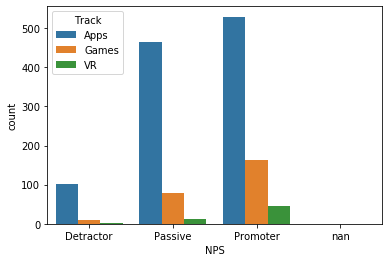

In [134]:
sns.countplot(x='NPS', hue='Track', data=df)

In [141]:
apps_prom_count = len(df[(df['NPS'] == 'Promoter') & (df['Track'] == 'Apps')])
apps_det_count = len(df[(df['NPS'] == 'Detractor') & (df['Track'] == 'Apps')])
apps_prom_det_ratio = apps_prom_count / (apps_prom_count + apps_det_count)
print(apps_prom_det_ratio)

games_prom_count = len(df[(df['NPS'] == 'Promoter') & (df['Track'] == 'Games')])
games_det_count = len(df[(df['NPS'] == 'Detractor') & (df['Track'] == 'Games')])
games_prom_det_ratio = games_prom_count / (games_prom_count + games_det_count)
print(games_prom_det_ratio)

vr_prom_count = len(df[(df['NPS'] == 'Promoter') & (df['Track'] == 'VR')])
vr_det_count = len(df[(df['NPS'] == 'Detractor') & (df['Track'] == 'VR')])
vr_prom_det_ratio = vr_prom_count / (vr_prom_count + vr_det_count)
print(vr_prom_det_ratio)

# 2) VR boasts the best promoter to defactor ratio.

0.838351822503962
0.9479768786127167
0.9583333333333334


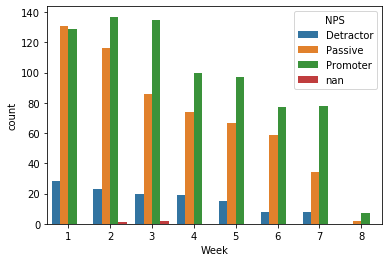

In [137]:
sns.countplot(x='Week', hue='NPS', data=df)

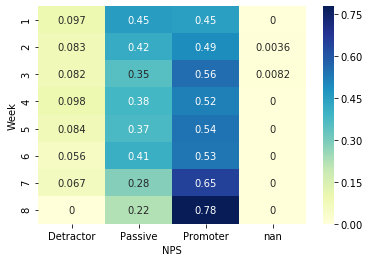

In [138]:
# 3) Yes, as outside of the margin of error between week 3 - 6, the data shows an overall increase of satisfaction the longer people stay.
sns.heatmap(pd.crosstab(df['Week'], df['NPS'], normalize='index'), cmap="YlGnBu", annot=True)

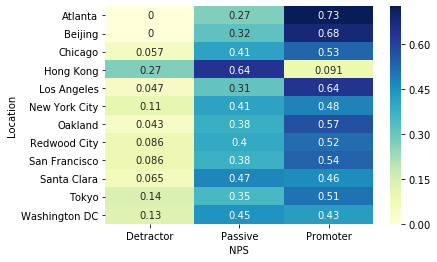

In [139]:
# 4) Yes, Atlanta and LA have the highest promoter ratio. 
# Hong kong has by far the lowest Promoter score and highest Passive score.
sns.heatmap(pd.crosstab(df['Location'], df['NPS'], normalize='index'), cmap="YlGnBu", annot=True)

In [142]:
# 5) We can find which tracks are succesful. 
# As well as what locations did best and how long people stayed in those locations.

In [143]:
# 6) This data set contains information of student satisfaction based on track and length of stay.

In [144]:
# 7) We can answer the questions found here (http://make.sc/sa-nps-project)

In [145]:
# 8) Whether or not financial factors play a role in satisfaction.
# How many people switched tracks midway.
# The person's performance vs satisfaction
# Whether or not that person found a job
# How many people stuck with coding after the academy
# How Game of Thrones went from one of the best shows to an alright show.

In [146]:
# 9) Probably to seize efforts in Hong Kong due to the low satisfaction rating.
# While VR has the highest satisfaction rating, enrollment for that track is extremely low and might not be worth continuing.

In [147]:
# 10) Percentages are super easy to understand, even if they're non-technical. If they don't understand percentages, a better question would be why they are making decisions?